<a href="https://colab.research.google.com/github/rogerwzeng/e17/blob/main/DGMD_PSET3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 3 (70 pts)


In this problem set, you'll explore some concepts in sensors and sensor fusion.

In [24]:
### DO NOT CHANGE ###
# importing the libraries (do not remove or add libraries)
from typing import List, Set, Dict, Tuple, Optional
import numpy as np

## NumPy Sensor Fusion (15 pts)

In this section, you'll build some functions for sensor fusion with `numpy`. Pay close attention to the shapes of the input and output.

### Average Sensor Fusion (5 pts)

`avg_sensor_fusion` (5 pts). You are working with a robot that is navigating a warehouse. To help it navigate better, it uses multiple RADAR sensors to determine how far objects are in front of it. Let say you have $n$ RADAR sensors collecting data every second up to time $t$ seconds. Your `sensor_data` will be a `n` by `t` numpy matrix (more precisely, it has shape `(n, t)`).

You want to create a function `avg_sensor_fusion` that does sensor fusion by averaging the sensor readings at each time step (just a simple average, no special weights). Your final result will be a vector of length `t` representing the average sensor readings at each time step (more precisely, it's shape should be `(t,)`). Implement the function `avg_sensor_fusion`.

**Hint**: Pay attention to the shape of the input / output. Use [`np.mean`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) and the `axis` parameter.

In [113]:
def avg_sensor_fusion(sensor_data: np.ndarray, axis: int=0) -> np.ndarray:
    # Check for error in input
    if not isinstance(sensor_data, np.ndarray):
        raise TypeError("Sensor data must be of type numpy.ndarray")
    if not isinstance(axis, int):
        raise TypeError("Axis must be an integer")

    return np.mean(sensor_data, axis=axis)

### Odd One Out (10 pts)

`odd_one_out` (10 pts). You are working with a robot that is navigating a warehouse. To help it navigate better, it uses multiple RADAR sensors to determine how far objects are in front of it. Let say you have $n$ RADAR sensors collecting data every second up to time $t$ seconds.

In your regular maintenance of the robot, you regularly assess the sensor data to see if any of the sensors are not working properly. There are multiple methods by which you can deem if a sensor is an odd one out. For this problem, we'll compare a single, potentially faulty sensor, called `sensor_i`, whose data is represented by a vector of size `t` (more precisely, has shape `(t,)`), against a collection of `n` working sensors, called `sensor_data`, whose data is represented by a `n` by `t` numpy matrix (more precisely, it has shape `(n, t)`). At each time step, we'll compare the average of the `n` working sensors reading with the value collected by the single, potentially faulty sensor. If the absolute delta or absolute difference between the average and the individual sensor reading is greater than some tolerance `atol`, we will count that as a faultly behavior for that time step; if it's within the tolerance `atol`, then we will count that as correct behavior for that time step. If the percentage of the time that we see faulty behavior is greater than or equal to some fault threshold `fault_threshold` (which will be some number between 0 to 1), then we will deem that the individual sensor is faulty (return `True`), otherwise the sensor will be deemed functional (return `False`). Implement this in the function `odd_one_out`.

In [114]:
def odd_one_out(sensor_i: np.ndarray, sensor_data: np.ndarray, atol: float, fault_threshold: float) -> bool:
    """
    Determines if a sensor is faulty compared to a collection of other sensors.
    
    Parameters:
    - sensor_data: A numpy array of shape (n, t) representing the readings from n working sensors over t time steps.
    - sensor_i: A numpy array of shape (t,) representing the readings from a single potentially faulty sensor over t time steps.
    - atol: The absolute tolerance level for considering a reading to be faulty.
    - fault_threshold: The percentage threshold of faulty readings above which the sensor is deemed faulty. Must be between 0 and 1.
    
    Returns:
    - True if the sensor is deemed faulty, False otherwise.
    """
    # Check validity of input values
    if not isinstance(sensor_i, np.ndarray) or sensor_i.ndim != 1:
        raise TypeError("sensor_i must be a 1D Numpy Array")
    if sensor_data.shape[1]!= sensor_i.size:
        raise ValueError("Average and single sensor must have the same number of time steps! ")
    if not (0 <= fault_threshold <= 1):
        raise ValueError("Fault threshold must be in [0, 1]")

    sensor_avg = avg_sensor_fusion(sensor_data)
    abs_diff = np.abs(sensor_i - sensor_avg)
    faulty_pct = np.sum(abs_diff > atol)/sensor_i.size

    return faulty_pct >= fault_threshold


## Interpreting IMU Data (20 pts)

In this section, you'll relate IMU data to potential situations that an autonomous vehicle might use to navigate on the road.

For IMU data, it's important to know the orientation. For this section, please refer to this diagram from the Society of Automotive Engineers (SAE) to see the orientation - this orientation will not change.

![](https://drive.google.com/uc?export=view&id=1rfJjE70Zbp78Q95roTdQ_Arp7JFxFLNo)
<center>Diagram showing vehicle axes of motion from SAE J670</center>

The above diagram provides the X, Y, and Z axes for the accelerometer. For the gyroscope, it is:
- Roll is along the X-axis (Gryoscope X)
- Pitch is along the Y-axis (Gryoscope Y)
- Yaw is along the Z-axis (Gryoscope Z)

Some additional notes:
- The positive direction for the accelerometer is indicated by direction of the arrowhead:
    - Forward is the positive direction for the X-axis
    - Left is the positive direction for the Y-axis
    - Up is the positive direction for the Z-axis
- The positive direction for rotation / gyroscope is in the counter-clockwise direction (where the clock's face is in the direction of the arrowhead):
    - For the X-axis, the positive direction is counter-clockwise when you look at the car from the front
    - For the Y-axis, the positive direction is counter-clockwise when you look at the car from the left side
    - For the Z-axis, the positive direction is counter-clockwise when you look at the car from the top
- A positive accelerometer output would indicate the car is increasing speed in the forward direction or slowing down in the reverse direction
- A zero accelerometer output would indicate the car is moving at constant speed
- A negative accelerometer output would indicate the car is increasing speed in the reverse direction or slowing down in the forward direction
- A positive gyroscope output would indicate the car is rotating in the positive direction
- A zero gyroscope output would indicate the car is not rotating
- A negative gyroscope output would indicate the car is rotating in the negative direction


You have data from the IMU sensors on four autonomous cars. You plot each of the IMU measurements (accelerometer and gyroscope along the X, Y, and Z axis over time) from the four cars, with each column of graphs representing one of the four vehicles. The columns of the graphs are labelled `A`, `B`, `C`, and `D`. Also, we use `ACC` as shorthand for the accelerometer data and `GYRO` as shorthand for the gyroscope data. The black, horizontal line represents the value zero (so values above it are positive, values below it are negative). Each car experienced a different situation as described below - based on the situation, match each car to their respective IMU plots. The answers should be one of the choices amongst `A`, `B`, `C`, or `D`.  

**Hint**: Think about how a car would move and rotate along the various axes and how it would look over time.

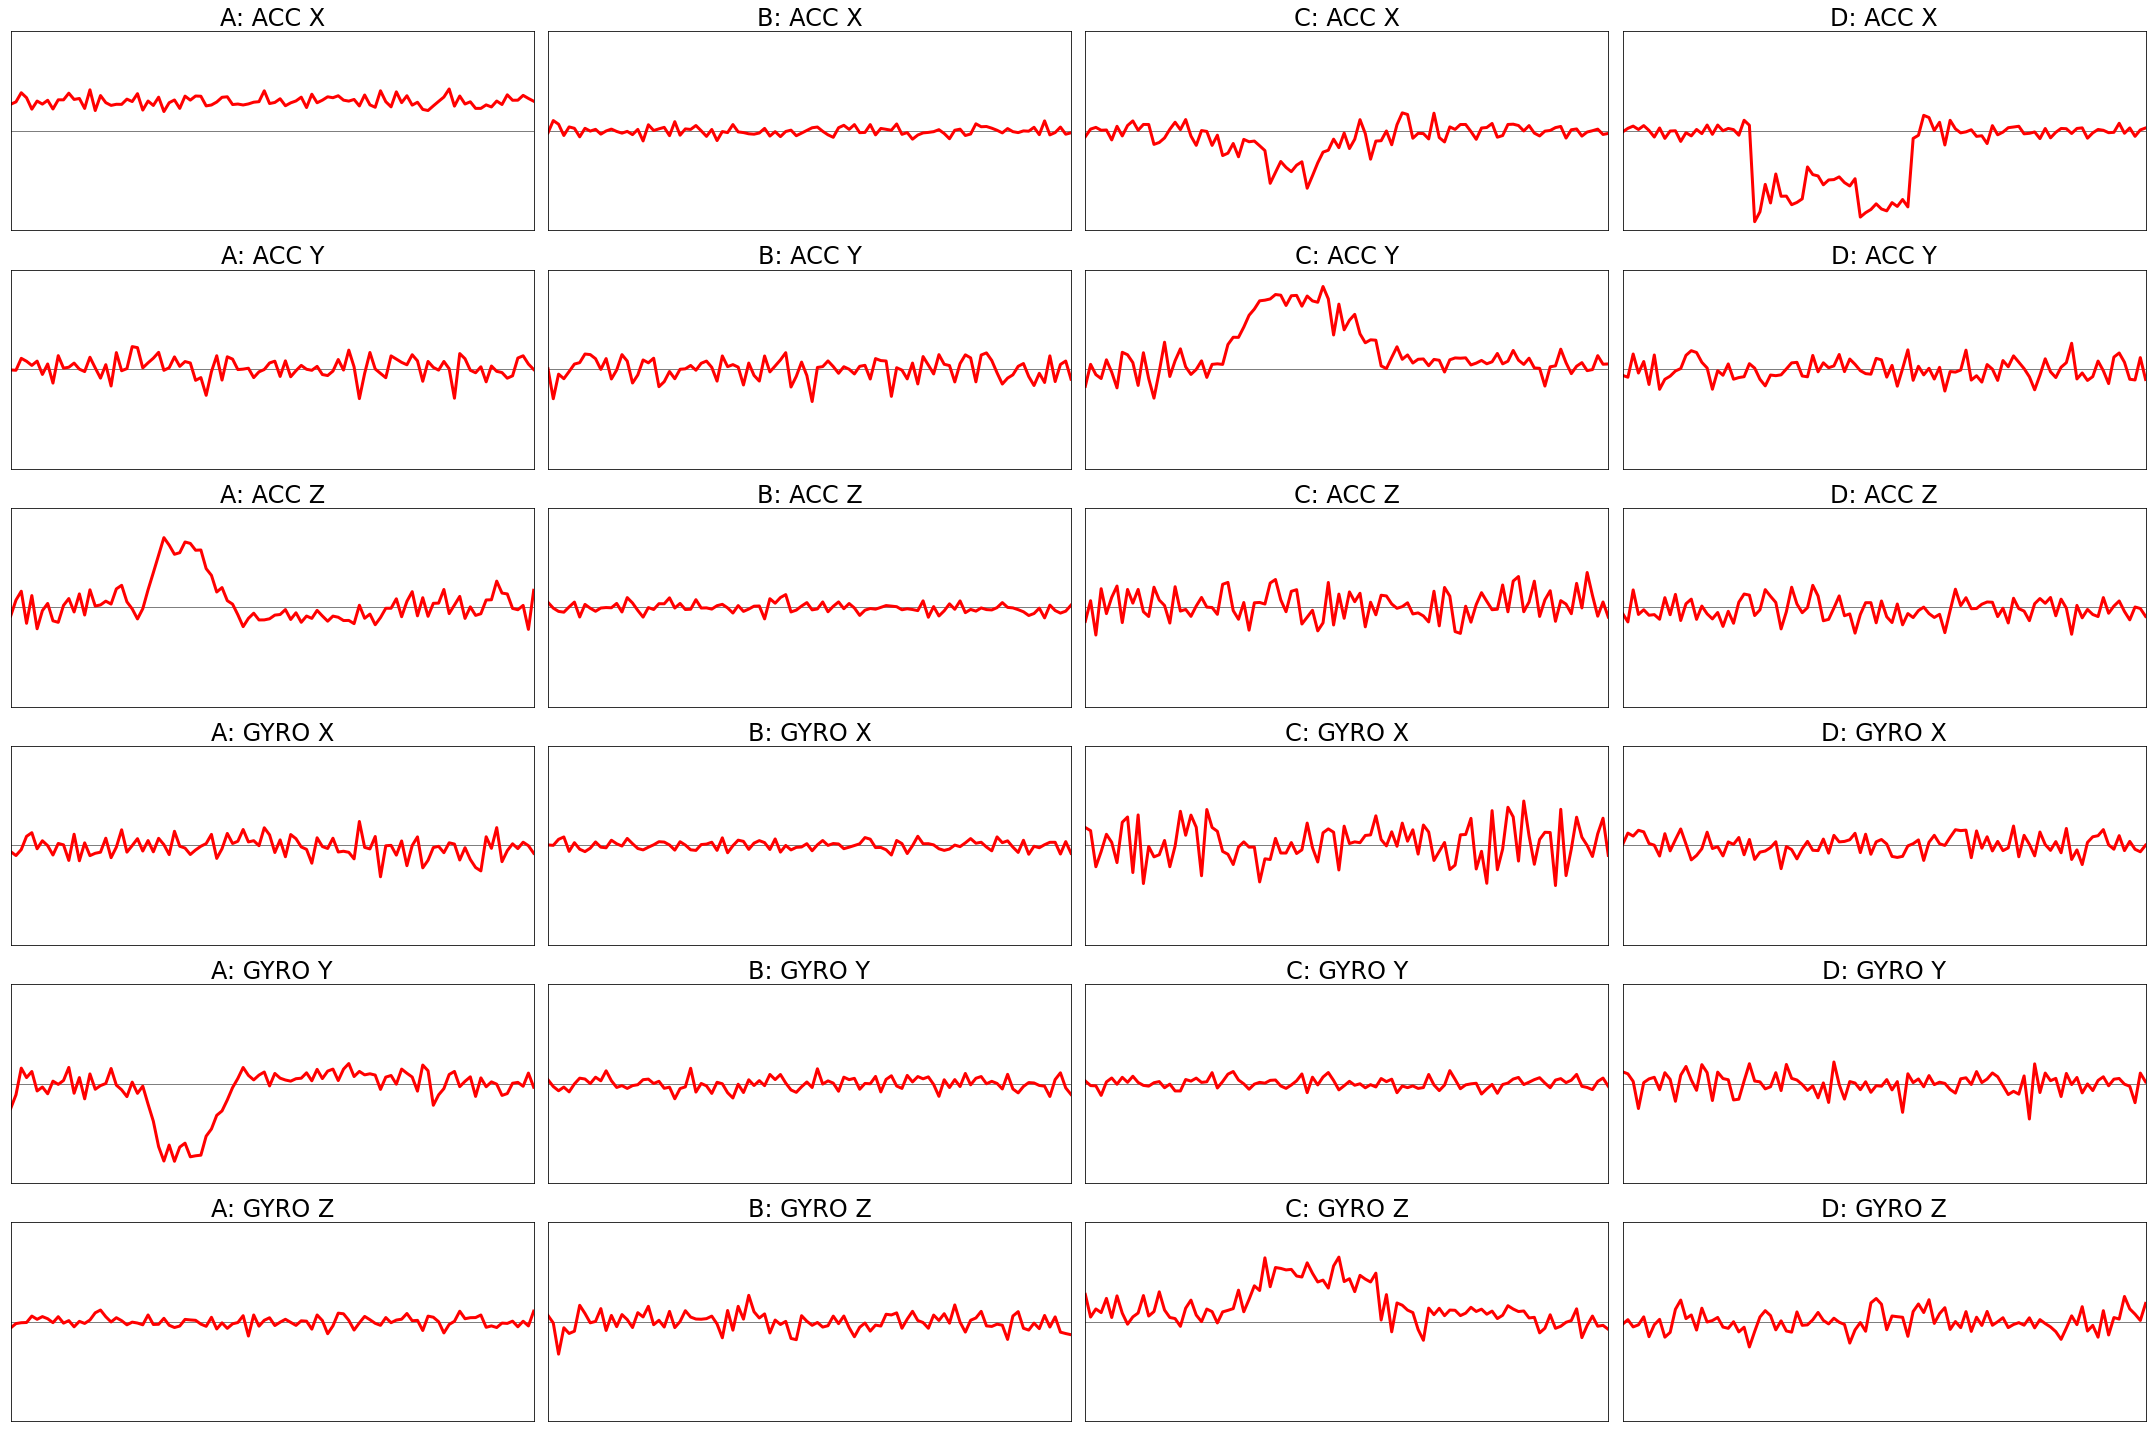

In [ ]:
### DO NOT CHANGE ###
#@title IMU Measurement Data
if __name__ == "__main__":
    import matplotlib.pyplot as plt
    import numpy as np

    t = 100
    time_vec = np.array(range(0, t))
    rng = np.random.default_rng(seed=4)
    fig, ax = plt.subplots(6, 4, figsize=(30, 20))

    plot_to_ax = {}
    for i, option in enumerate(["A", "B", "C", "D"]):
        for j, imu_measurement in enumerate(["ACC X", "ACC Y", "ACC Z", "GYRO X", "GYRO Y", "GYRO Z"]):
            ax[j, i].set_xticks([])
            ax[j, i].set_yticks([])
            ax[j, i].set_xlim((0, t-1))
            ax[j, i].set_ylim((-5, 5))
            ax[j, i].set_title(f"{option}: {imu_measurement}", fontsize=24)
            ax[j, i].axhline(y = 0, c = "black", linewidth = 0.5)
            plot_to_ax[(option, imu_measurement)] = ax[j, i]

    # A: This car hit a speed bump while traveling at fast speed.
    a_acc_x = rng.normal(1.5, 0.25, t)
    a_acc_y = rng.normal(0, 0.5, t)
    a_acc_z = np.concatenate([
        rng.normal(0, 0.5, 25),
        np.linspace(0, 3.5, 5) + rng.normal(0, 0.1, 5),
        rng.normal(3, 0.25, 5),
        np.linspace(3, -1, 10) + rng.normal(0, 0.25, 10),
        rng.normal(-0.6, 0.25, 25),
        rng.normal(0, 0.5, 30)
        ])
    a_gyro_x = rng.normal(0, 0.5, t)
    a_gyro_y = np.concatenate([
        rng.normal(0, 0.5, 25),
        np.linspace(0, -4, 5) + rng.normal(0, 0.2, 5),
        rng.normal(-3.5, 0.25, 5),
        np.linspace(-3.75, 1, 10) + rng.normal(0, 0.25, 10),
        rng.normal(0.5, 0.25, 25),
        rng.normal(0, 0.5, 30)
        ])
    a_gyro_z = rng.normal(0, 0.25, t)

    plot_to_ax[("A", "ACC X")].plot(time_vec, a_acc_x, c = 'r', linewidth = 3)
    plot_to_ax[("A", "ACC Y")].plot(time_vec, a_acc_y, c = 'r', linewidth = 3)
    plot_to_ax[("A", "ACC Z")].plot(time_vec, a_acc_z, c = 'r', linewidth = 3)
    plot_to_ax[("A", "GYRO X")].plot(time_vec, a_gyro_x, c = 'r', linewidth = 3)
    plot_to_ax[("A", "GYRO Y")].plot(time_vec, a_gyro_y, c = 'r', linewidth = 3)
    plot_to_ax[("A", "GYRO Z")].plot(time_vec, a_gyro_z, c = 'r', linewidth = 3)

    # B: This car is moving at a constant speed on a straight highway.
    b_acc_x = rng.normal(0, 0.2, t)
    b_acc_y = rng.normal(0, 0.5, t)
    b_acc_z = rng.normal(0, 0.25, t)
    b_gyro_x = rng.normal(0, 0.2, t)
    b_gyro_y = rng.normal(0, 0.3, t)
    b_gyro_z = rng.normal(0, 0.4, t)

    plot_to_ax[("B", "ACC X")].plot(time_vec, b_acc_x, c = 'r', linewidth = 3)
    plot_to_ax[("B", "ACC Y")].plot(time_vec, b_acc_y, c = 'r', linewidth = 3)
    plot_to_ax[("B", "ACC Z")].plot(time_vec, b_acc_z, c = 'r', linewidth = 3)
    plot_to_ax[("B", "GYRO X")].plot(time_vec, b_gyro_x, c = 'r', linewidth = 3)
    plot_to_ax[("B", "GYRO Y")].plot(time_vec, b_gyro_y, c = 'r', linewidth = 3)
    plot_to_ax[("B", "GYRO Z")].plot(time_vec, b_gyro_z, c = 'r', linewidth = 3)

    # C: This car had to make a sharp left turn at an intersection.
    c_acc_x = np.concatenate([
        rng.normal(0, 0.2, 10),
        rng.normal(0, 0.5, 15),
        rng.normal(-0.75, 0.5, 10),
        rng.normal(-2.25, 0.5, 10),
        rng.normal(-0.75, 0.5, 10),
        rng.normal(0, 0.5, 15),
        rng.normal(0, 0.2, 30),
        ])
    c_acc_y = np.concatenate([
        rng.normal(0, 0.75, 25),
        np.linspace(0, 4, 10) + rng.normal(0, 0.5, 10),
        rng.normal(3.5, 0.35, 10),
        np.linspace(4, -0.05, 15) + rng.normal(0, 0.75, 15),
        rng.normal(0.5, 0.25, 25),
        rng.normal(0, 0.5, 15)
        ])
    c_acc_z = rng.normal(0, 0.75, t)
    c_gyro_x = rng.normal(0, 1, t)
    c_gyro_y = rng.normal(0, 0.3, t)
    c_gyro_z = np.concatenate([
        rng.normal(0.5, 0.5, 25),
        np.linspace(0, 2.5, 10) + rng.normal(0, 0.5, 10),
        rng.normal(2.5, 0.35, 10),
        np.linspace(3, -0.5, 20) + rng.normal(0, 0.75, 20),
        rng.normal(0.5, 0.25, 20),
        rng.normal(0, 0.5, 15)
        ])

    plot_to_ax[("C", "ACC X")].plot(time_vec, c_acc_x, c = 'r', linewidth = 3)
    plot_to_ax[("C", "ACC Y")].plot(time_vec, c_acc_y, c = 'r', linewidth = 3)
    plot_to_ax[("C", "ACC Z")].plot(time_vec, c_acc_z, c = 'r', linewidth = 3)
    plot_to_ax[("C", "GYRO X")].plot(time_vec, c_gyro_x, c = 'r', linewidth = 3)
    plot_to_ax[("C", "GYRO Y")].plot(time_vec, c_gyro_y, c = 'r', linewidth = 3)
    plot_to_ax[("C", "GYRO Z")].plot(time_vec, c_gyro_z, c = 'r', linewidth = 3)

    # D: This car had to brake suddenly to avoid a potential car crash.
    d_acc_x = np.concatenate([
        rng.normal(0, 0.2, 10),
        rng.normal(0, 0.5, 15),
        rng.normal(-3.5, 0.5, 10),
        rng.normal(-2.25, 0.5, 10),
        rng.normal(-3.75, 0.25, 10),
        rng.normal(0, 0.5, 15),
        rng.normal(0, 0.2, 30),
        ])
    d_acc_y = rng.normal(0, 0.5, t)
    d_acc_z = rng.normal(0, 0.5, t)
    d_gyro_x = rng.normal(0, 0.5, t)
    d_gyro_y = rng.normal(0, 0.5, t)
    d_gyro_z = rng.normal(0, 0.5, t)

    plot_to_ax[("D", "ACC X")].plot(time_vec, d_acc_x, c = 'r', linewidth = 3)
    plot_to_ax[("D", "ACC Y")].plot(time_vec, d_acc_y, c = 'r', linewidth = 3)
    plot_to_ax[("D", "ACC Z")].plot(time_vec, d_acc_z, c = 'r', linewidth = 3)
    plot_to_ax[("D", "GYRO X")].plot(time_vec, d_gyro_x, c = 'r', linewidth = 3)
    plot_to_ax[("D", "GYRO Y")].plot(time_vec, d_gyro_y, c = 'r', linewidth = 3)
    plot_to_ax[("D", "GYRO Z")].plot(time_vec, d_gyro_z, c = 'r', linewidth = 3)

    plt.tight_layout()

Note: the data displayed is for demonstrative purposes - real world IMU data may be more noisy and harder to parse. Furthermore, if the plots are not visible, make sure to run the code cell associated with `IMU Measurement Data`

`car1` (5 pts). This autonomous car is moving forward at a constant speed on a straight highway.

`car2` (5 pts). This autonomous car is driving straight and had to make a sharp left turn at an intersection.

`car3` (5 pts). This autonomous car was driving straight and hit a speed bump while traveling at constant, fast speed.

`car4` (5 pts). This autonomous car was driving straight and had to brake suddenly to avoid a potential car crash.

In [ ]:
#@title Your Answers
car1 = "B" #@param ["", "A", "B", "C", "D"]

car2 = "C" #@param ["", "A", "B", "C", "D"]

car3 = "A" #@param ["", "A", "B", "C", "D"]

car4 = "D" #@param ["", "A", "B", "C", "D"]

## Drone Sensor Fusion (30 pts)

In this section, you'll solve some problems involving LiDAR and sensor fusion.

### Context

You have a drone that is surveying a national park to assess how high different natural structures, such as trees, mountains, and rock formations, are. The drone is equipped with various sensors. As you work through the problems, you will be expose to how different sensors can work in tandem to provide measurements about the drone's environment.

For this section, please use $c = 3 \times 10^8$ meters per second for the speed of light in your calculations. **In terms of numeric precision, please have 4 decimal point precision (if applicable) (e.g., 3.1415 has 4 decimal point precision). Additionally, only provide the numeric answer (do not include any units or other text in the answer field)**.

### Measurement 1 (5 pts)

`measurement1` (5 pts). You have a drone that is leveled perfectly / parallel with the ground. The ground below the drone has no structures (just the ground / grass). The LiDAR sensor shoots a pulse of light straight down and receieves the light back in 0.0000015 seconds. How far is the drone from the ground (in meters)?

**Hint**: See the below graphic - the solid, red line represents the pulse from the LiDAR sensor. From physics, we can model distance travelled as speed multiplied by time taken. Remember, that the light for LiDAR needs to travel the distance twice, once to the ground and then back to the drone.

![](https://drive.google.com/uc?export=view&id=1kL9Gai-YiURi9kQuOTBLeebKh5OFIt4L)


In [ ]:
#@title Measurement 1
#@markdown **In terms of numeric precision, please have 4 decimal point precision (if applicable) (e.g., 3.1415 has 4 decimal point precision). Additionally, only provide the numeric answer (do not include any units or other text in the answer field).**
measurement1 = "225.0000" #@param {type:"string"}

### Measurement 2 (5 pts)

`measurement2` (5 pts). You have a drone that is leveled perfectly / parallel with the ground. The ground below the drone has a tree. The LiDAR sensor shoots a pulse of light straight down and receieves the light back in 0.00000066 seconds. You can use a similar calculation from previous part to determine how far the drone is from the tree (in meters).

However, you are more interested in determining the height of the tree. Thus, you can pair your LiDAR reading with GPS data. The GPS data will tell you the drone's position as an $(X, Y, Z)$ coordinate (the coordinate position will be relative to the drone's launchpoint on the ground which will serve as the $(0, 0, 0)$ coordinate and its units are meters). The GPS sensor indicates the drone is at position $(1000, 500, 175)$.

How tall is the tree below the drone (in meters)?

**Hint**: See the below graphic - the solid, red line represents the pulse from the LiDAR sensor. The $Z$-coordinate from the GPS tells you the height of the drone from the ground. With the distance between the drone and the tree and the height of the drone from the ground, you can calculate the height of the tree.

![](https://drive.google.com/uc?export=view&id=1gc-RmYvWTvHkPeFTjcDeAjDLqjL0gM-u)

In [ ]:
#@title Measurement 2
#@markdown **In terms of numeric precision, please have 4 decimal point precision (if applicable) (e.g., 3.1415 has 4 decimal point precision). Additionally, only provide the numeric answer (do not include any units or other text in the answer field).**
measurement2 = "76.0000" #@param {type:"string"}

### Measurement 3 (10 pts)

`measurement3` (10 pts). You have a drone that is leveled perfectly / parallel with the ground. The ground below the drone has trees. The LiDAR sensor rotates where it sends the light beam / pulse to measure the forest side to side. The LiDAR shoots a pulse of light to the left at an angle $\theta = 60°$, hitting a tree, and receives the light back in 0.0000014 seconds. The GPS sensor indicates the drone is at position $(2000, 750, 195)$.

How tall is the tree that the LiDAR pulse hit (in meters)?

**Hint**: See the below graphic - the solid, red line represents the pulse from the LiDAR sensor; you're interested in the height of the tree the pulse hit. This problem builds on the calculations from the previous parts. However, now the distance derived from the LiDAR is at an angle, but you can get the vertical component of it by using the properties of right triangles (via sine, cosine, and/or tangent) - here's a [refresher tutorial](https://www.mathsisfun.com/algebra/trig-finding-side-right-triangle.html).

![](https://drive.google.com/uc?export=view&id=1InASHqUzFdqKCBnRx-JHyzHn7EzS4AYE)


In [ ]:
#@title Measurement 3
#@markdown **In terms of numeric precision, please have 4 decimal point precision (if applicable) (e.g., 3.1415 has 4 decimal point precision). Additionally, only provide the numeric answer (do not include any units or other text in the answer field).**
measurement3 = "90.0000" #@param {type:"string"}

### Measurement 4 (10 pts)

`measurement4` (10 pts). Your drone is experiencing some turbulence - the IMU sensor on board was able to detect some rotation from the drone. The drone is now at an angle $\varphi = 36°$ to the right (as shown below). The ground below the drone has trees. The LiDAR shoots a pulse of light to the left at an angle $\theta =24°$ (relative to it's new orientation), hitting a tree, and receieves the light back in 0.0000024 seconds. The GPS sensor indicates the drone is at position $(-100, 70, 240)$.

Combining information from the LiDAR, GPS, and IMU, how tall is the tree that the LiDAR pulse hit (in meters)?

**Hint**: See the below graphic - the solid, red line represents the pulse from the LiDAR sensor; you're interested in the height of the tree the pulse hit. This problem builds on the calculations from the previous parts. However, now the distance derived from the LiDAR is at an angle, both from the angle the LiDAR shot the pulse and the drone body itself from turbulence. You still want the vertical component of it by using the properties of right triangles (via sine, cosine, and/or tangent) but now you have to factor in the angle of the drone's orientation. The pink dash line and the non-vertical black dash are actually parallel / along the same axis of the drone - with this information and the properties of angles along parallel lines, you should be able to create a right triangle to properly model the situation. Here's a refresher on the [properties of angles along parallel lines](https://thirdspacelearning.com/gcse-maths/geometry-and-measure/angles-in-parallel-lines/#:~:text=re%20still%20stuck.-,What%20are%20angles%20in%20parallel%20lines%3F,angle%20around%20the%20intersecting%20transversal.)

![](https://drive.google.com/uc?export=view&id=13sT9ruL0orrVuJOzn-nDKv9OZ54FlmRD)

In [ ]:
#@title Measurement 4
#@markdown **In terms of numeric precision, please have 4 decimal point precision (if applicable) (e.g., 3.1415 has 4 decimal point precision). Additionally, only provide the numeric answer (do not include any units or other text in the answer field).**
measurement4 = "60.0000" #@param {type:"string"}

## Problem Set Survey (5 pts)

Please fill out the survey questions (the first five are each worth 1 point; the last one is optional).


1.   `TIME` (1 pt): approximately how many hours did you spend on the problem set? Please use decimals to express partial hours (e.g., a value of `2.5` means two and half hours).
2.   `DIFFICULTY` (1 pt): on a scale of 1-10, how difficult was this problem set with 1 being very easy and 10 being very hard?
3.   `FAVORITE_PART` (1 pt): What was your favorite topic / learning from the unit (i.e., between the last pset and this pset)? This should contain at least 10 words.
4.   `WENT_WELL` (1 pt): What went well? Describe what went well with the course so far (this can be about the lecture, assignments, and/or other course content). This should contain at least 10 words.
5.   `CHALLENGING` (1 pt): What was challenging? Describe what was challenging or didn't go well with the course so far (this can be about the lecture, assignments, and/or other course content). This should contain at least 10 words.
6.   `COMMENTARY` (0 pt): If there is anything else you'd like to share with course staff, please add it here. If not, no need to change / edit the default string.


In [ ]:
#@title Problem Set Survey Questions
TIME = "2.5" #@param {type:"string"}

DIFFICULTY = "3" #@param ["", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]

FAVORITE_PART = "the last question where data from LiDAR, GPS and IMU were combined to find tree height" #@param {type:"string"}

WENT_WELL = "a lot of in-take in this course as I had little exposure to sensors before" #@param {type:"string"}

CHALLENGING = "some of the the electronics were pretty complex, e.g. CMOS v.s. CCD" #@param {type:"string"}

COMMENTARY = "" #@param {type:"string"}

**<font color='red'>To submit, please download as a Python (.py) file and submit on Gradescope (navigate to File > Download > Download .py). Please use the correct file name and comment out any test / extraneous code to avoid any compile and parser issues </font>**